In [1]:
import numpy as np
from westpa.analysis import Run
import h5py
import pickle
import matplotlib.pyplot as plt
import time
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
f = h5py.File('pdist.h5')

In [3]:
f.keys()

<KeysViewHDF5 ['binbounds_0', 'binbounds_1', 'histograms', 'midpoints_0', 'midpoints_1', 'n_iter']>

In [4]:
histogram = np.array(f['histograms'])

In [5]:
custom_map = cm.get_cmap('jet')
newcolors = custom_map(np.linspace(0,1,8))
#newcolors[0,:]=[1, 1, 1, 1]
new_cmp = ListedColormap(newcolors)

In [6]:
str(int(list(f['binbounds_0'])[8]))

'-150'

/tmp/ipykernel_16740/4029858116.py:3: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(-np.log(histogram[99].T), cmap='inferno', vmax=100)


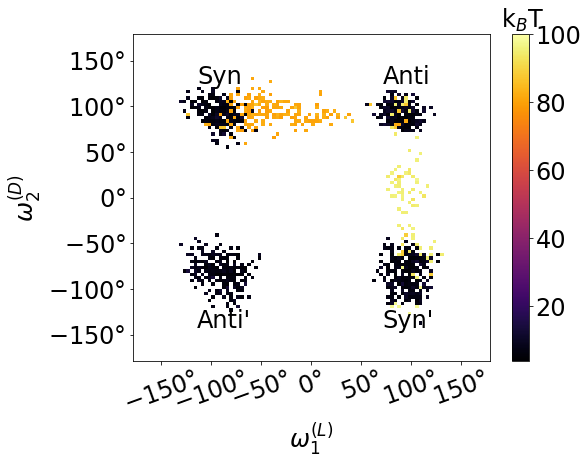

In [16]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '24'
plt.pcolormesh(-np.log(histogram[99].T), cmap='inferno', vmax=100)
plt.colorbar()
plt.text(103,102,r'k$_B$T')
plt.text(18,85,r'Syn')
plt.text(70,85,r'Anti')
plt.text(18,10,r"Anti'")
plt.text(70,10,r"Syn'")
pos = [8,22,36,50,64,78,92]
labels = ['-150','-100','-50','0','50', '100','150']
labels = ['$'+str(int(i))+ '\degree$' for i in labels]
plt.xticks(pos,labels,rotation=20)
plt.yticks(pos,labels)
plt.xlabel(r'$\omega_1^{(L)}$')
plt.ylabel(r'$\omega_2^{(D)}$')
plt.savefig('ld_run7_fullfes_100iter.jpg', dpi=300, bbox_inches='tight', facecolor='w')

# Test

In [1]:
import numpy as np
from westpa.analysis import Run
import h5py

In [2]:
west = Run.open('west.h5')

In [13]:
pcoord = west.iteration(200).pcoords[:,1,:]

In [15]:
pcoord.shape

(1134, 2)

In [24]:
np.where( (pcoord[:,0]>50) & (pcoord[:,1]<-50) )

(array([  42,   43,   44,   45,   46,   47,   48,   49,   50,   51,   52,
          53,   54,   55,   84,   85,   86,   87,   88,   89,   90,   91,
          92,   93,   94,   95,   96,   97,   98,   99,  100,  101,  102,
         103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,
         114,  115,  116,  117,  118,  161,  162,  163,  164,  165,  166,
         167,  168,  169,  170,  171,  172,  173,  174,  175,  176,  177,
         178,  179,  180,  181,  182,  183,  184,  185,  186,  187,  188,
         231,  232,  233,  234,  235,  236,  237,  238,  239,  240,  241,
         242,  243,  244,  245,  246,  247,  248,  249,  250,  251,  252,
         253,  254,  255,  256,  257,  258,  259,  260,  261,  262,  263,
         264,  265,  301,  302,  303,  304,  305,  306,  307,  308,  309,
         310,  311,  312,  313,  314,  315,  316,  317,  318,  319,  321,
         322,  323,  324,  325,  326,  327,  328,  329,  330,  331,  332,
         333,  334,  335,  364,  365, 

In [8]:
import numpy as np
from westpa.analysis import Run
import h5py

In [9]:
west = Run.open('west.h5')

In [10]:
z = 0
for i in range(1,201):
    z += west.iteration(i).num_walkers

In [11]:
z*25/1000/1000

5.866524999999999

# Load direct*.h5, for state populations

In [25]:
import numpy as np
from westpa.analysis import Run
import h5py
import pickle
import matplotlib.pyplot as plt
import time
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

f = h5py.File('direct_C_T_2it.h5')

In [26]:
f.keys()

<KeysViewHDF5 ['arrivals', 'avg_color_probs', 'avg_conditional_fluxes', 'avg_rates', 'avg_state_probs', 'avg_total_fluxes', 'color_prob_evolution', 'conditional_arrivals', 'conditional_flux_evolution', 'conditional_fluxes', 'duration_count', 'durations', 'rate_evolution', 'state_labels', 'state_pop_evolution', 'target_flux_evolution', 'total_fluxes']>

In [33]:
np.array(f['state_pop_evolution'])[99]

array([(2, 102, 0.46966316, 0.469013  , 0.47035829, 0.00033101, 0),
       (2, 102, 0.51856169, 0.51794411, 0.5192466 , 0.00032414, 0)],
      dtype=[('iter_start', '<u4'), ('iter_stop', '<u4'), ('expected', '<f8'), ('ci_lbound', '<f8'), ('ci_ubound', '<f8'), ('sterr', '<f8'), ('corr_len', '<u4')])